<a href="https://colab.research.google.com/github/mrcosta58/NYTimes/blob/master/MasterCook_County_Setencing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rows
236K
Columns
39
Each row is a
Charge
Columns in this Dataset
Column Name	Description	Type
CASE_ID	
Internal unique identifier for each case

CASE_PARTICIPANT_ID	
Internal unique identifier for each person associated with a case

OFFENSE_CATEGORY	
Broad offense categories before specific charges are filed on a case

PRIMARY_CHARGE	
A flag for the top charge, usually the way the case is referred to

Data Type
Checkbox

CHARGE_ID	
Internal unique identifier for each charge filed

CHARGE_VERSION_ID	
Internal unique identifier for each version of a charge associated with charges filed

DISPOSITION_CHARGED_OFFENSE_TITLE	
The specific title of the charge offense

DISPOSITION_CHARGED_CHAPTER	
The legal chapter for the charge

DISPOSITION_CHARGED_ACT	
The legal act for the charge

DISPOSITION_CHARGED_SECTION	
The legal section for the charge

DISPOSITION_CHARGED_CLASS	
The legal class of the charge

DISPOSITION_CHARGED_AOIC	
Administrative Office of the Illinois Courts ID for law of the charge

DISPOSITION_DATE	
The date the charge was disposed of

CHARGE_DISPOSITION	
The result of the charge

CHARGE_DISPOSITION_REASON	
Additional information about the result of the charge

SENTENCE_PHASE	
Sentencing phase explains when this version of the sentence was created

SENTENCE_DATE	
Date of when the charge was sentenced

SENTENCE_JUDGE	
Judge who oversaw the sentencing

SENTENCE_TYPE	
A broad type of sentence issued

CURRENT_SENTENCE	
This is a flag which row represents a current sentence.
Checkbox

COMMITMENT_TYPE	
A more specific type of sentence issued

COMMITMENT_TERM	
The number associated with the sentence (use this with commitment_unit to understand length of sentence)

COMMITMENT_UNIT	
The unit associated with the sentence (use this with commitment_term to understand length of sentence)

COURT_NAME	
The Circuit Court District the sentence was determined in

COURT_FACILITY	
The courthouse the sentence was determined in

LENGTH_OF_CASE_in_Days	
Number of days between a charge being arraigned and a charge being sentenced

AGE_AT_INCIDENT	
Recorded age at the time of the incident

GENDER	
Recorded gender of the defendant

RACE	
Recorded race of the defendant

INCIDENT_BEGIN_DATE	
Date of when the incident began

INCIDENT_END_DATE	
Date of when the incident ended (this will be blank for incidents that did not go more than one day)

ARREST_DATE	
Date and time of arrest

LAW_ENFORCEMENT_AGENCY	
Law enforcement agency associated with the arrest

UNIT	
The law enforcement unit associated with the arrest

INCIDENT_CITY	
The city where the incident took place

RECEIVED_DATE	
Date when felony review received the case

ARRAIGNMENT_DATE	
Date of the arraignment



UPDATED_OFFENSE_CATEGORY	
​This field is the offense category for the case updated based upon the top charge for the primary offender. It can differ from the first offense category assigned to the case in part because cases evolve.

CHARGE_COUNT	
The charge count of the charged offense.


In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

In [0]:
#pd.set_option('max_rows',1000)
#pd.set_option('max_colwidth', 400)

In [0]:
url='https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/rows.csv?accessType=DOWNLOAD'
df=pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
def fix_col(col):
  return col.replace('_', '').rstrip('.').lstrip('/')

def tweak_CC0(df):

  return (df
   .rename(columns=fix_col))
dfModified=tweak_CC0(df)

In [0]:
dfModified.loc[150:200]

,CASEID,CASEPARTICIPANTID,OFFENSECATEGORY,PRIMARYCHARGE,CHARGEID,CHARGEVERSIONID,DISPOSITIONCHARGEDOFFENSETITLE,DISPOSITIONCHARGEDCHAPTER,DISPOSITIONCHARGEDACT,DISPOSITIONCHARGEDSECTION,DISPOSITIONCHARGEDCLASS,DISPOSITIONCHARGEDAOIC,DISPOSITIONDATE,CHARGEDISPOSITION,CHARGEDISPOSITIONREASON,SENTENCEPHASE,SENTENCEDATE,SENTENCEJUDGE,SENTENCETYPE,CURRENTSENTENCE,COMMITMENTTYPE,COMMITMENTTERM,COMMITMENTUNIT,COURTNAME,COURTFACILITY,LENGTHOFCASEinDays,AGEATINCIDENT,GENDER,RACE,INCIDENTBEGINDATE,INCIDENTENDDATE,ARRESTDATE,LAWENFORCEMENTAGENCY,UNIT,INCIDENTCITY,RECEIVEDDATE,ARRAIGNMENTDATE,UPDATEDOFFENSECATEGORY,CHARGECOUNT
150,51397225061,219494597092,PROMIS Conversion,True,431163197717,138969269466,THEFT/DECEPTION/ >10K <100K,720-5\16-1(A)(2)6,NaN,NaN,2,0001015570,8/11/2014 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,8/11/2014 12:00:00 AM,NaN,Prison,True,Illinois Department of Corrections,4,Year(s),District 2 - Skokie,Skokie Courthouse,3906.0,32.0,Male,White,4/26/2003 12:00:00 AM,NaN,8/12/2003 11:00:00 AM,NORTHFIELD POLICE DEPARTMENT,NaN,NaN,9/11/2003 12:00:00 AM,12/1/2003 12:00:00 AM,PROMIS Conversion,1
151,51411241750,219381208641,PROMIS Conversion,True,431755015684,102700752274,REVOKED/SUSPENDED 2ND+ DUI,625-5\6-303(D),NaN,NaN,4,0005883000,1/15/2014 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,1/15/2014 12:00:00 AM,Bridget Jane Hughes,Probation,True,Probation,12,Months,District 3 - Rolling Meadows,Rolling Meadows Courthouse,NaN,28.0,Male,White,3/4/2003 12:00:00 AM,NaN,3/4/2003 12:00:00 AM,WHEELING POLICE DEPARTMENT,NaN,NaN,3/4/2003 12:00:00 AM,NaN,PROMIS Conversion,1
152,51413782274,220401587446,PROMIS Conversion,True,431311078269,141217134143,RET THEFT/DISPLAY MERCH/>$150,720-5\16A-3(A)2,NaN,NaN,3,0001060200,9/30/2011 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,9/30/2011 12:00:00 AM,Timothy J Chambers,Probation,True,Probation,18,Months,District 1 - Chicago,PROMIS,NaN,18.0,Male,White,5/25/2003 12:00:00 AM,NaN,5/25/2003 12:00:00 AM,NILES POLICE DEPARTMENT,NaN,NaN,5/25/2003 12:00:00 AM,NaN,Retail Theft,1
153,51504058508,200299702852,PROMIS Conversion,False,374163526436,195567986043,MURDER/STRONG PROB KILL/INJURE,720,5,9-1(A)(2),M,0000735100,8/23/2013 12:00:00 AM,Verdict Guilty,NaN,Original Sentencing,12/16/2013 12:00:00 AM,Thomas V Gainer,Jail,True,Cook County Department of Corrections,80,Year(s),District 1 - Chicago,26TH Street,NaN,20.0,Male,HISPANIC,12/17/2002 12:00:00 AM,NaN,12/19/2002 12:00:00 AM,C P D AREA 4,NaN,NaN,12/19/2002 12:00:00 AM,NaN,Homicide,20
154,51504058508,200299702852,PROMIS Conversion,False,373706575532,137057114378,AGG DISCHARGE FIREARM/OCC VEH,720,5,24-1.2(A)(2),1,0001214850,8/23/2013 12:00:00 AM,Verdict Guilty,NaN,Original Sentencing,12/16/2013 12:00:00 AM,Thomas V Gainer,Jail,True,Illinois Department of Corrections,10,Year(s),District 1 - Chicago,26TH Street,NaN,20.0,Male,HISPANIC,12/17/2002 12:00:00 AM,NaN,12/19/2002 12:00:00 AM,C P D AREA 4,NaN,NaN,12/19/2002 12:00:00 AM,NaN,Homicide,27
155,51504058508,200299702852,PROMIS Conversion,True,373703322160,159435471175,MURDER/INTENT TO KILL/INJURE,720,5,9-1(A)(1),M,0000735000,8/23/2013 12:00:00 AM,Verdict Guilty,NaN,Original Sentencing,5/3/2005 12:00:00 AM,Lon William Shultz,Conversion,True,Illinois Department of Corrections,80,Year(s),District 1 - Chicago,26TH Street,NaN,20.0,Male,HISPANIC,12/17/2002 12:00:00 AM,NaN,12/19/2002 12:00:00 AM,C P D AREA 4,NaN,NaN,12/19/2002 12:00:00 AM,NaN,Homicide,1
156,51515622276,202052357644,PROMIS Conversion,True,374702698927,159436478102,MURDER/INTENT TO KILL/INJURE,720,5,9-1(A)(1),M,0000735000,6/18/2012 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,11/14/2006 12:00:00 AM,Diane Gordon Cannon,Conversion,False,Natural Life,NaN,NaN,District 1 - Chicago,PROMIS,NaN,17.0,Male,Black,6/1/2001 12:00:00 AM,NaN,12/18/2002 1:00:00 PM,C P D AREA 4,NaN,NaN,12/18/2002 12:00:00 AM,NaN,Homicide,1
157,51515622276,202052357644,PROMIS Conversion,True,374702698927,159436478102,MURDER/INTENT TO KILL/INJURE,720,5,9-1(A)(1),

In [0]:
dfModified[dfModified.COMMITMENTTERM.str.contains(r'([^0-9\.\-])', na=False)]

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,CASEID,CASEPARTICIPANTID,OFFENSECATEGORY,PRIMARYCHARGE,CHARGEID,CHARGEVERSIONID,DISPOSITIONCHARGEDOFFENSETITLE,DISPOSITIONCHARGEDCHAPTER,DISPOSITIONCHARGEDACT,DISPOSITIONCHARGEDSECTION,DISPOSITIONCHARGEDCLASS,DISPOSITIONCHARGEDAOIC,DISPOSITIONDATE,CHARGEDISPOSITION,CHARGEDISPOSITIONREASON,SENTENCEPHASE,SENTENCEDATE,SENTENCEJUDGE,SENTENCETYPE,CURRENTSENTENCE,COMMITMENTTYPE,COMMITMENTTERM,COMMITMENTUNIT,COURTNAME,COURTFACILITY,LENGTHOFCASEinDays,AGEATINCIDENT,GENDER,RACE,INCIDENTBEGINDATE,INCIDENTENDDATE,ARRESTDATE,LAWENFORCEMENTAGENCY,UNIT,INCIDENTCITY,RECEIVEDDATE,ARRAIGNMENTDATE,UPDATEDOFFENSECATEGORY,CHARGECOUNT
33746,114821819974,891247299612,Narcotics,True,2027922380933,472042184056,POSSESSION OF A CONTROLLED SUBSTANCE,720,570,402(c),4,5101110,1/15/2012 12:00:00 AM,Plea Of Guilty,NaN,Probation Violation Sentencing,5/17/2013 12:00:00 AM,Charles P Burns,Probation,False,Probation,24 wrap,Months,District 1 - Chicago,26TH Street,702.0,43.0,Female,Black,4/29/2011 12:00:00 AM,NaN,4/29/2011 10:31:00 AM,CHICAGO PD,District 21 - Prairie,Chicago,5/3/2011 12:00:00 AM,6/15/2011 12:00:00 AM,Narcotics,1
43218,115465010760,899182263315,Narcotics,False,2048561773740,465369343458,POSSESSION OF A CONTROLLED SUBSTANCE,720,570,402(c),4,5101110,1/12/2012 12:00:00 AM,Finding Guilty,NaN,Original Sentencing,1/10/2012 12:00:00 AM,Darron Edward Bowden,Probation,True,Probation,two,Year(s),District 6 - Markham,Markham Courthouse,67.0,57.0,Male,Black,8/18/2011 12:00:00 AM,NaN,8/18/2011 5:10:00 PM,SOUTH HOLLAND PD,NaN,South Holland,8/18/2011 12:00:00 AM,11/4/2011 12:00:00 AM,Narcotics,2
43300,115470267018,899245817131,Aggravated DUI,True,2050615538839,476614037119,DRVG UNDER INFLU/BAC 0.08,625,5,11-501(a)(1),A,0011394,5/1/2012 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,5/1/2012 12:00:00 AM,Kay M Hanlon,Probation,True,Probation,18 months,Months,District 3 - Rolling Meadows,Rolling Meadows Courthouse,176.0,21.0,Male,White,8/12/2011 12:00:00 AM,NaN,8/30/2011 9:00:00 AM,ELK GROVE VILLAGE PD,NaN,Elk Grove Village,8/22/2011 12:00:00 AM,11/7/2011 12:00:00 AM,Aggravated DUI,1
67068,117028265730,917387734853,Burglary,True,2100787269298,477390310998,BURGLARY,720,5,19-1(a),2,1110000,9/28/2012 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,9/28/2012 12:00:00 AM,ELLEN MANDELTORT,Probation,True,Probation,30 months,Months,District 3 - Rolling Meadows,Rolling Meadows Courthouse,93.0,20.0,Male,White,5/11/2012 12:00:00 AM,5/12/2012 12:00:00 AM,5/16/2012 5:42:00 PM,HANOVER PARK PD,NaN,Hanover Park,5/16/2012 12:00:00 AM,6/27/2012 12:00:00 AM,Burglary,1
175559,124569594476,1013785976340,Aggravated Fleeing and Eluding,False,2360266766219,537230662443,AGGRAVATED FLEEING OR ATTEMPT TO ELUDE A PEACE...,625,5,11-204.1(a)(1),4,0011405,5/17/2018 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,5/17/2018 12:00:00 AM,Kerry M Kennedy,Probation,True,Probation,"1,154.00",Dollars,District 5 - Bridgeview,Bridgeview Courthouse,755.0,23.0,Male,White,2/1/2016 12:00:00 AM,NaN,2/1/2016 10:35:00 PM,OAK LAWN PD,NaN,Oak Lawn,2/2/2016 12:00:00 AM,4/22/2016 12:00:00 AM,Aggravated Fleeing and Eluding,2
218598,128031935508,1060251555339,Forgery,False,2484232370667,566080340107,IDENTITY THEFT/KNOWS ID STOLEN,720,5,16-30(a)(4),3,0016446,8/7/2018 12:00:00 AM,Plea Of Guilty,NaN,Original Sentencing,8/7/2018 12:00:00 AM,Brian K Flaherty,2nd Chance Probation,True,2nd Chance Probation,2`,Year(s),District 6 - Markham,Markham Courthouse,131.0,28.0,Male,Black,2/21/2018 12:00:00 AM,NaN,2/21/2018 3:15:00 AM,SAUK VILLAGE PD,NaN,Sauk Village,2/21/2018 12:00:00 AM,3/29/2018 12:00:00 AM,Identity Theft,4


In [0]:
def tweak_CC1(dfModified):
       
    RACE = (dfModified.RACE
      .fillna('Not Reported')
      .replace({'White [Hispanic or Latino]':'Hispanic','White/Black [Hispanic or Latino]':'Hispanic','Unknown':'Not Reported','ASIAN':'Asian','HISPANIC':'Hispanic'})    
    )   
    AGEATINCIDENT = (dfModified.AGEATINCIDENT
      .fillna(1000)
      .astype(int)
      .rename('AGEATINCIDENT')
    )
    GENDER=(dfModified.GENDER
      .fillna('Not Reported')
      .replace({'Male name, no gender given':'Other','Unknown':'Other','Unknown Gender':'Other'})
    )
    OFFENSECATEGORY=(dfModified.OFFENSECATEGORY
      .fillna('Not Reported')
      .replace({'PROMIS Conversion':'Conversion'})
    )
    DISPOSITIONCHARGEDOFFENSETITLE=(dfModified.DISPOSITIONCHARGEDOFFENSETITLE
      .fillna('Not Reported') 
    )
    CHARGEDISPOSITION=(dfModified.CHARGEDISPOSITION
      .fillna('Not Reported')
    )
    CHARGEDISPOSITIONREASON=(dfModified.CHARGEDISPOSITIONREASON
      .fillna('Not Reported')  
    )
    SENTENCEJUDGE=(dfModified.SENTENCEJUDGE
      .fillna('Other Judge')
    ) 
    COMMITMENTTYPE=(dfModified.COMMITMENTTYPE
      .fillna('Not Reported')
    ) 
    COMMITMENTUNIT=(dfModified.COMMITMENTUNIT
      .replace({'Months':'Years','Term':'Years','Natural Life':'Years','Dollars':'Years','Hours':'Years','Weeks':'Years', 'Days':'Years','Pounds':'Years','Ounces':'Years','Kilos':'Years'})        
      .fillna('Years')
    )
    COMMITMENTTERM=(dfModified.COMMITMENTTERM
      .replace({'24 wrap':24,'two':2,'months':'',',':'','`':'','1,154.00':1154},regex=True)
      .fillna(1000)
      #.replace({'NaN':'1000'})
      .astype(float)
      .round(0)
      .astype(int)
      #.astype(int)  
    ) 
    LAWENFORCEMENTAGENCY=(dfModified.LAWENFORCEMENTAGENCY       
      .fillna('Other Agency')
    ) 
    INCIDENTCITY=(dfModified.INCIDENTCITY      
      .fillna('Other City')
    ) 
    SENTENCEPHASE=(dfModified.SENTENCEPHASE      
      .fillna('Original Sentencing')
    ) 
    COURTNAME=(dfModified.COURTNAME      
      .fillna('Not Reported')
    ) 
    COURTFACILITY=(dfModified.COURTFACILITY     
      .fillna('Not Reported')
    ) 
    CHARGEVERSIONID=(dfModified.CHARGEVERSIONID     
      .fillna(99999999999)
    ) 
    LENGTHOFCASEinDays=(dfModified.LENGTHOFCASEinDays     
      #.apply(lambda x:x.fillna(x.mean()))
      .fillna(1000)
      .astype(int)

    ) 
    ARRESTDATE=(dfModified.ARRESTDATE     
      .fillna('5/25/2003 12:00:00 AM')#Not working
      #.ffill
       .replace({'NaT':'5/25/2003 12:00:00 AM'})
    ) 
    INCIDENTBEGINDATE=(dfModified.INCIDENTBEGINDATE     
      .fillna(3333)#Not working

    )
    ARRESTDATE=pd.to_datetime(dfModified.ARRESTDATE, errors='coerce')
    COMMITMENTTERM = pd.to_numeric(dfModified.COMMITMENTTERM, errors='coerce')
    ARRAIGNMENTDATE=pd.to_datetime(dfModified.ARRAIGNMENTDATE, errors='coerce')
    RECEIVEDDATE=pd.to_datetime(dfModified.RECEIVEDDATE, errors='coerce')
    INCIDENTBEGINDATE=pd.to_datetime(dfModified.INCIDENTBEGINDATE, errors='coerce')
    DISPOSITIONDATE=pd.to_datetime(dfModified.DISPOSITIONDATE, errors='coerce')
    SENTENCEDATE=pd.to_datetime(dfModified.SENTENCEDATE, errors='coerce')

    #DAYSFROMINCIDENTTOARREST=dfModified.ARRESTDATE-dfModified.INCIDENTBEGINDATE
    

    return pd.concat([CHARGEVERSIONID,RACE,GENDER,LENGTHOFCASEinDays,OFFENSECATEGORY,CHARGEDISPOSITIONREASON,
                      DISPOSITIONCHARGEDOFFENSETITLE,CHARGEDISPOSITION, 
                      INCIDENTBEGINDATE,ARRESTDATE,RECEIVEDDATE,ARRAIGNMENTDATE,SENTENCEDATE,DISPOSITIONDATE,
                      AGEATINCIDENT,SENTENCEJUDGE,COMMITMENTTYPE,
                      COMMITMENTUNIT,COMMITMENTTERM,LAWENFORCEMENTAGENCY,COURTFACILITY,COURTNAME,SENTENCEPHASE,INCIDENTCITY], axis=1)
     
dfModified2 = tweak_CC1(dfModified)

In [98]:
dfModified2.isna().mean(axis=0)*100

CHARGEVERSIONID                   0.000000
RACE                              0.000000
GENDER                            0.000000
LENGTHOFCASEinDays                0.000000
OFFENSECATEGORY                   0.000000
CHARGEDISPOSITIONREASON           0.000000
DISPOSITIONCHARGEDOFFENSETITLE    0.000000
CHARGEDISPOSITION                 0.000000
INCIDENTBEGINDATE                 0.973217
ARRESTDATE                        2.066711
RECEIVEDDATE                      0.000000
ARRAIGNMENTDATE                   7.951331
SENTENCEDATE                      0.006353
DISPOSITIONDATE                   0.002118
AGEATINCIDENT                     0.000000
SENTENCEJUDGE                     0.000000
COMMITMENTTYPE                    0.000000
COMMITMENTUNIT                    0.000000
COMMITMENTTERM                    0.683539
LAWENFORCEMENTAGENCY              0.000000
COURTFACILITY                     0.000000
COURTNAME                         0.000000
SENTENCEPHASE                     0.000000
INCIDENTCIT

In [94]:
nan_rows = dfModified2[dfModified2['ARRESTDATE'].isna()]
nan_rows.loc[:3000,'INCIDENTBEGINDATE':'DISPOSITIONDATE']

,INCIDENTBEGINDATE,ARRESTDATE,RECEIVEDDATE,ARRAIGNMENTDATE,SENTENCEDATE,DISPOSITIONDATE
176,NaT,NaT,2001-06-29,NaT,1982-04-05,2015-08-13
194,1981-04-22,NaT,1986-01-29,NaT,1983-08-04,2017-07-26
195,1981-04-22,NaT,1986-01-29,NaT,2017-07-24,2017-07-26
532,2005-03-01,NaT,2005-05-12,NaT,2012-11-29,2012-11-29
533,2005-03-01,NaT,2005-05-12,NaT,2012-11-29,2012-11-29
975,2007-12-22,NaT,2008-01-03,NaT,2014-02-25,2014-02-25
976,2007-12-22,NaT,2008-01-03,NaT,2014-02-25,2014-02-25
1084,2003-05-05,NaT,2007-05-15,NaT,2011-07-19,2011-07-19
1085,2003-05-05,NaT,2007-05-15,NaT,2011-07-19,2011-07-19
1086,2003-05-05,NaT,2007-05-15,NaT,2011-07-19,2011-07-19


In [96]:
nan_rows = dfModified2[dfModified2['COMMITMENTTERM'].isna()]
nan_rows.loc[:3000,'COMMITMENTTYPE':'LAWENFORCEMENTAGENCY']

,COMMITMENTTYPE,COMMITMENTUNIT,COMMITMENTTERM,LAWENFORCEMENTAGENCY
0,Natural Life,Years,NaN,CHICAGO POLICE DEPT
1,Natural Life,Years,NaN,CHICAGO POLICE DEPT
2,Natural Life,Years,NaN,CHICAGO POLICE DEPT
10,Natural Life,Years,NaN,CHICAGO POLICE DEPT
31,Natural Life,Years,NaN,C P D AREA 4
156,Natural Life,Years,NaN,C P D AREA 4
194,Natural Life,Years,NaN,PROMIS Data Conversion
256,Not Reported,Years,NaN,C P D AREA 1 DIST 7
686,Not Reported,Years,NaN,MT. PROSPECT POLICE DEPARTMENT
1014,Not Reported,Years,NaN,CALUMET CITY POLICE DEPARTMENT


In [0]:
dfModified2.dtypes

CHARGEVERSIONID                            int64
RACE                                      object
GENDER                                    object
LENGTHOFCASEinDays                         int64
OFFENSECATEGORY                           object
CHARGEDISPOSITIONREASON                   object
DISPOSITIONCHARGEDOFFENSETITLE            object
CHARGEDISPOSITION                         object
INCIDENTBEGINDATE                 datetime64[ns]
ARRESTDATE                        datetime64[ns]
RECEIVEDDATE                      datetime64[ns]
ARRAIGNMENTDATE                   datetime64[ns]
SENTENCEDATE                      datetime64[ns]
DISPOSITIONDATE                   datetime64[ns]
AGEATINCIDENT                              int64
SENTENCEJUDGE                             object
COMMITMENTTYPE                            object
COMMITMENTUNIT                            object
COMMITMENTTERM                           float64
LAWENFORCEMENTAGENCY                      object
COURTFACILITY       

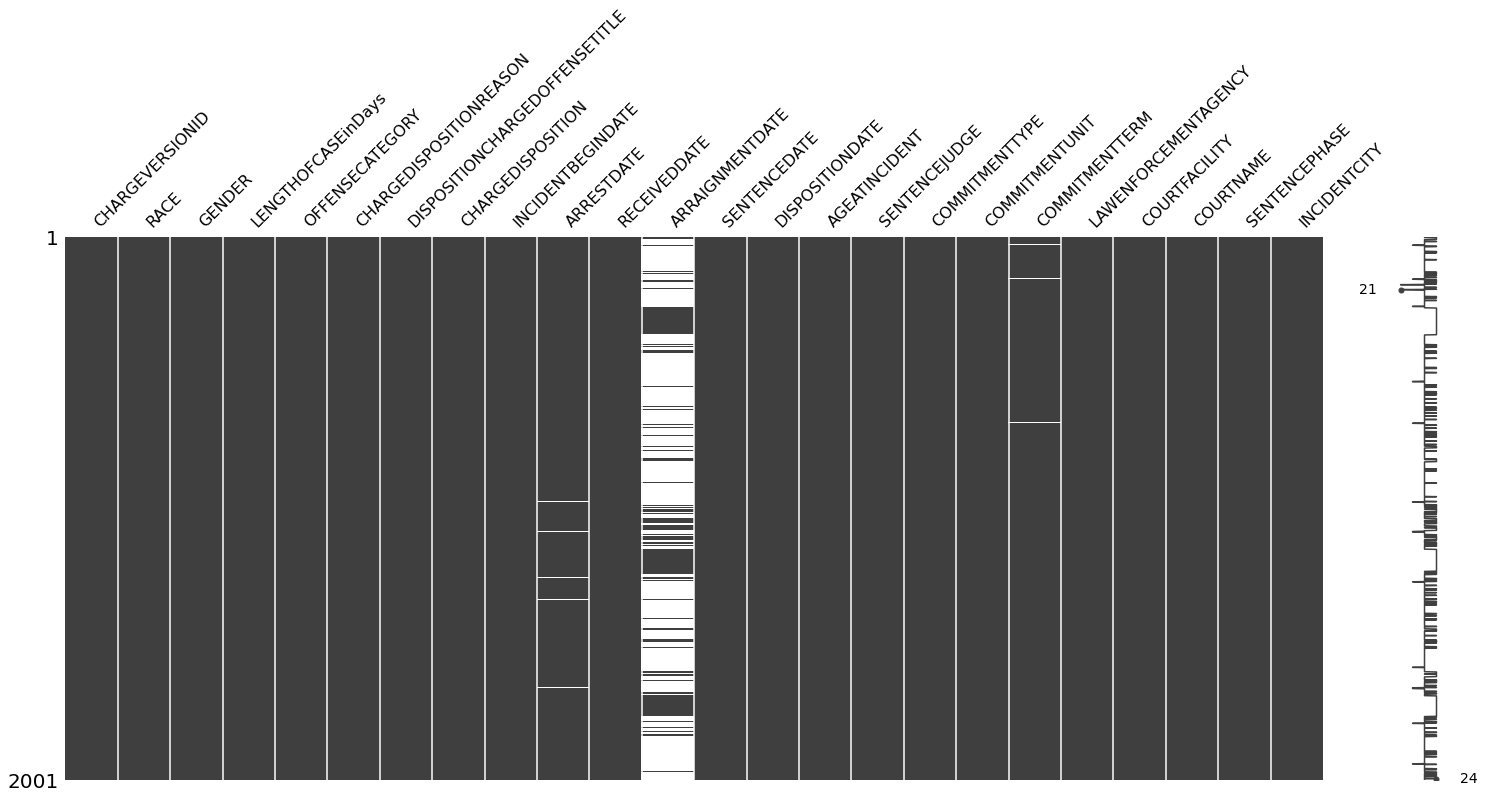

In [0]:
mn.matrix(dfModified2.loc[:2000,:])

In [0]:
dfModified2.COMMITMENTTERM.isna().sum()


1614

In [0]:
(dfModified2
  .COMMITMENTTERM
  .fillna(0)
  .astype(int))

0          0
1          0
2          0
3         30
4         30
          ..
236119     2
236120     2
236121     2
236122     1
236123     3
Name: COMMITMENTTERM, Length: 236124, dtype: int64

In [0]:
dfModified2.dtypes

CHARGEVERSIONID                            int64
RACE                                      object
GENDER                                    object
LENGTHOFCASEinDays                         int64
OFFENSECATEGORY                           object
CHARGEDISPOSITIONREASON                   object
DISPOSITIONCHARGEDOFFENSETITLE            object
CHARGEDISPOSITION                         object
INCIDENTBEGINDATE                 datetime64[ns]
ARRESTDATE                        datetime64[ns]
RECEIVEDDATE                      datetime64[ns]
ARRAIGNMENTDATE                   datetime64[ns]
SENTENCEDATE                      datetime64[ns]
DISPOSITIONDATE                   datetime64[ns]
AGEATINCIDENT                              int64
SENTENCEJUDGE                             object
COMMITMENTTYPE                            object
COMMITMENTUNIT                            object
COMMITMENTTERM                           float64
LAWENFORCEMENTAGENCY                      object
COURTFACILITY       

In [0]:
dfModified2.loc[0:50]

,CHARGEVERSIONID,RACE,GENDER,ARRAIGNMENTDATE,ARRESTDATE,RECEIVEDDATE,INCIDENTBEGINDATE,SENTENCEDATE,DISPOSITIONDATE,INCIDENTENDDATE,AGEATINCIDENT,SENTENCEJUDGE,COMMITMENTTYPE,COMMITMENTUNIT,COMMITMENTTERM,LAWENFORCEMENTAGENCY,COURTFACILITY,COURTNAME,SENTENCEPHASE,INCIDENTCITY
0,83571817251,Black,Male,1984-09-21,1984-08-15 00:00:00,1984-08-15,1984-08-09,1986-06-02,2014-12-17,NaT,27,John Mannion,Natural Life,Years,1000,CHICAGO POLICE DEPT,Markham Courthouse,District 6 - Markham,Original Sentencing,Other City
1,94830742153,Black,Male,1984-09-21,1984-08-15 00:00:00,1984-08-15,1984-08-09,1986-06-02,2014-12-17,NaT,27,John Mannion,Natural Life,Years,1000,CHICAGO POLICE DEPT,Markham Courthouse,District 6 - Markham,Original Sentencing,Other City
2,94826043158,Black,Male,1984-09-21,1984-08-15 00:00:00,1984-08-15,1984-08-09,1986-06-02,2014-12-17,NaT,27,John Mannion,Natural Life,Years,1000,CHICAGO POLICE DEPT,Markham Courthouse,District 6 - Markham,Original Sentencing,Other City
3,70461958445,Black,Male,1984-09-21,1984-08-15 00:00:00,1984-08-15,1984-08-09,2014-10-16,2014-12-17,NaT,27,Clayton Jay Crane,Illinois Department of Corrections,Year(s),30,CHICAGO POLICE DEPT,Markham Courthouse,District 6 - Markham,Amended/Corrected Sentencing,Other City
4,70461958445,Black,Male,1984-09-21,1984-08-15 00:00:00,1984-08-15,1984-08-09,1986-06-02,2014-12-17,NaT,27,John Mannion,Illinois Department of Corrections,Year(s),30,CHICAGO POLICE DEPT,Markham Courthouse,District 6 - Markham,Original Sentencing,Other City
5,70609573999,Black,Male,1984-09-21,1984-08-15 00:00:00,1984-08-15,1984-08-09,1986-06-02,2014-12-17,NaT,27,John Mannion,Illinois Department of Corrections,Year(s),30,CHICAGO POLICE DEPT,Markham Courthouse,District 6 - Markham,Original Sentencing,Other City
6,80671262249,Black,Male,1984-09-21,1984-08-15 00:00:00,1984-08-15,1984-08-09,2014-10-16,2014-12-17,NaT,27,Clayton Jay Crane,Illinois Department of Corrections,Year(s),30,CHICAGO POLICE DEPT,Markham Courthouse,District 6 - Markham,Amended/Corrected Sentencing,Other City
7,80671262249,Black,Male,1984-09-21,1984-08-15 00:00:00,1984-08-15,1984-08-09,1986-06-02,2014-12-17,NaT,27,John Mannion,Illinois Department of Corrections,Year(s),30,CHICAGO POLICE DEPT,Markham Courthouse,District 6 - Markham,Original Sentencing,Other City
8,80670053936,Black,Male,1984-09-21,1984-08-15 00:00:00,1984-08-15,1984-08-09,1986-06-02,2014-12-17,NaT,27,John Mannion,Illinois Department of Corrections,Year(s),30,CHICAGO POLICE DEPT,Markham Courthouse,District 6 - Markham,Original Sentencing,Other City
9,81124312440,Black,Male,1984-09-21,1984-08-15 00:00:00,1984-08-15,1984-08-09,2014-10-16,2014-12-17,NaT,27,Clayton Jay Crane,Illinois Department of Corrections,Year(s),62,CHICAGO POLICE DEPT,Markham Courthouse,District 6 - Markham,Amended/Corrected Sentencing,Other City


In [0]:
dfModified2.shape

(236124, 23)

In [0]:
dfModified2.SENTENCEJUDGE.value_counts()

James B Linn                 6178
Nicholas R Ford              5341
Colleen Ann Hyland           4950
Charles P Burns              4917
Thaddeus L Wilson            4478
                             ... 
Jeffrey A Malak                 1
Patrick W O'Brien               1
Claudia Grace Conlon            1
Edwin A Gausselin               1
Joyce Marie Murphy Gorman       1
Name: SENTENCEJUDGE, Length: 325, dtype: int64

In [0]:
dfModified2.describe()#Need to correct extra long  and negative LENGTH and too high AGES

,CHARGEVERSIONID,LENGTHOFCASEinDays,AGEATINCIDENT
count,2.361240e+05,236124.000000,236124.000000
mean,4.984456e+11,363.332863,44.842176
std,7.447036e+10,2797.629657,109.944687
min,6.745272e+10,-328549.000000,17.000000
25%,4.756131e+11,77.000000,23.000000
50%,5.057682e+11,201.000000,30.000000
75%,5.395550e+11,461.000000,41.000000
max,5.896340e+11,329379.000000,1000.000000


In [0]:
dfModified2.OFFENSECATEGORY.value_counts(dropna=False)

Narcotics                       63737
UUW - Unlawful Use of Weapon    24223
Retail Theft                    14720
Aggravated DUI                  14549
Burglary                        11625
                                ...  
Failure To Pay Child Support       13
Tampering                          13
Gambling                           12
Benefit Recipient Fraud             2
Compelling Gang Membership          2
Name: OFFENSECATEGORY, Length: 88, dtype: int64

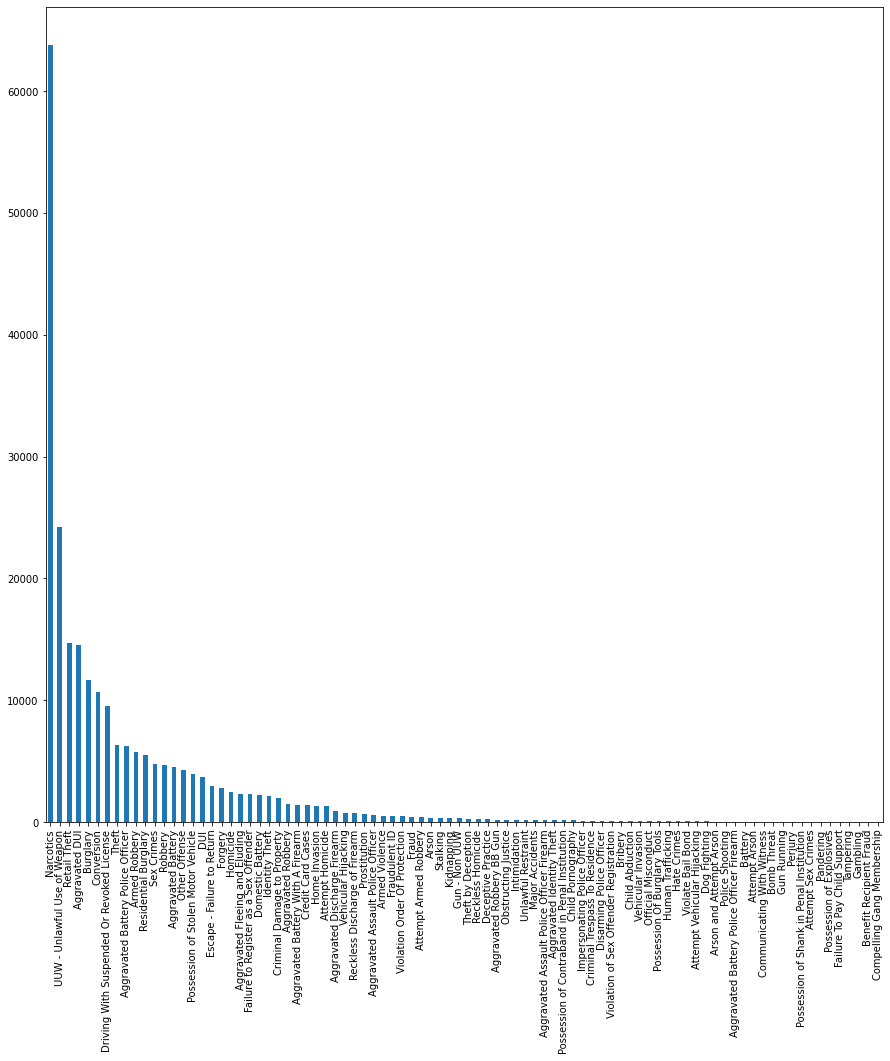

In [0]:
(dfModified2
 .OFFENSECATEGORY
 .value_counts(dropna=False)
 .plot(kind="bar", figsize=(15,15))
 )

In [0]:
dfModified.CHARGEVERSIONID.value_counts(dropna=False)#limited number of duplicate identifiers

496433120166    13
496384317753    10
466486093047     9
466527377070     7
459736994482     7
                ..
471137761886     1
508987759217     1
520799285863     1
575091870232     1
475386189875     1
Name: CHARGEVERSIONID, Length: 220786, dtype: int64

In [0]:
dfModified2.DISPOSITIONCHARGEDOFFENSETITLE.value_counts(dropna=False)

POSSESSION OF A CONTROLLED SUBSTANCE                                                                              36413
AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL                                                                 14966
RETAIL THEFT                                                                                                      13388
FELONY DRIVING WHILE DRIVER?S LICENSE, PERMIT, OR PRIVILEGE TO OPERATE A MOTOR VEHICLE IS SUSPENDED OR REVOKED    10503
AGGRAVATED UNLAWFUL USE OF WEAPON                                                                                  9689
                                                                                                                  ...  
FI INST FRAUD/FLS REP>$10K-$100K                                                                                      1
AGG DUI/PREVIOUS RECK HOMICIDE                                                                                        1
HRSMT/OBSCENE PROPOSAL/VIC <18          

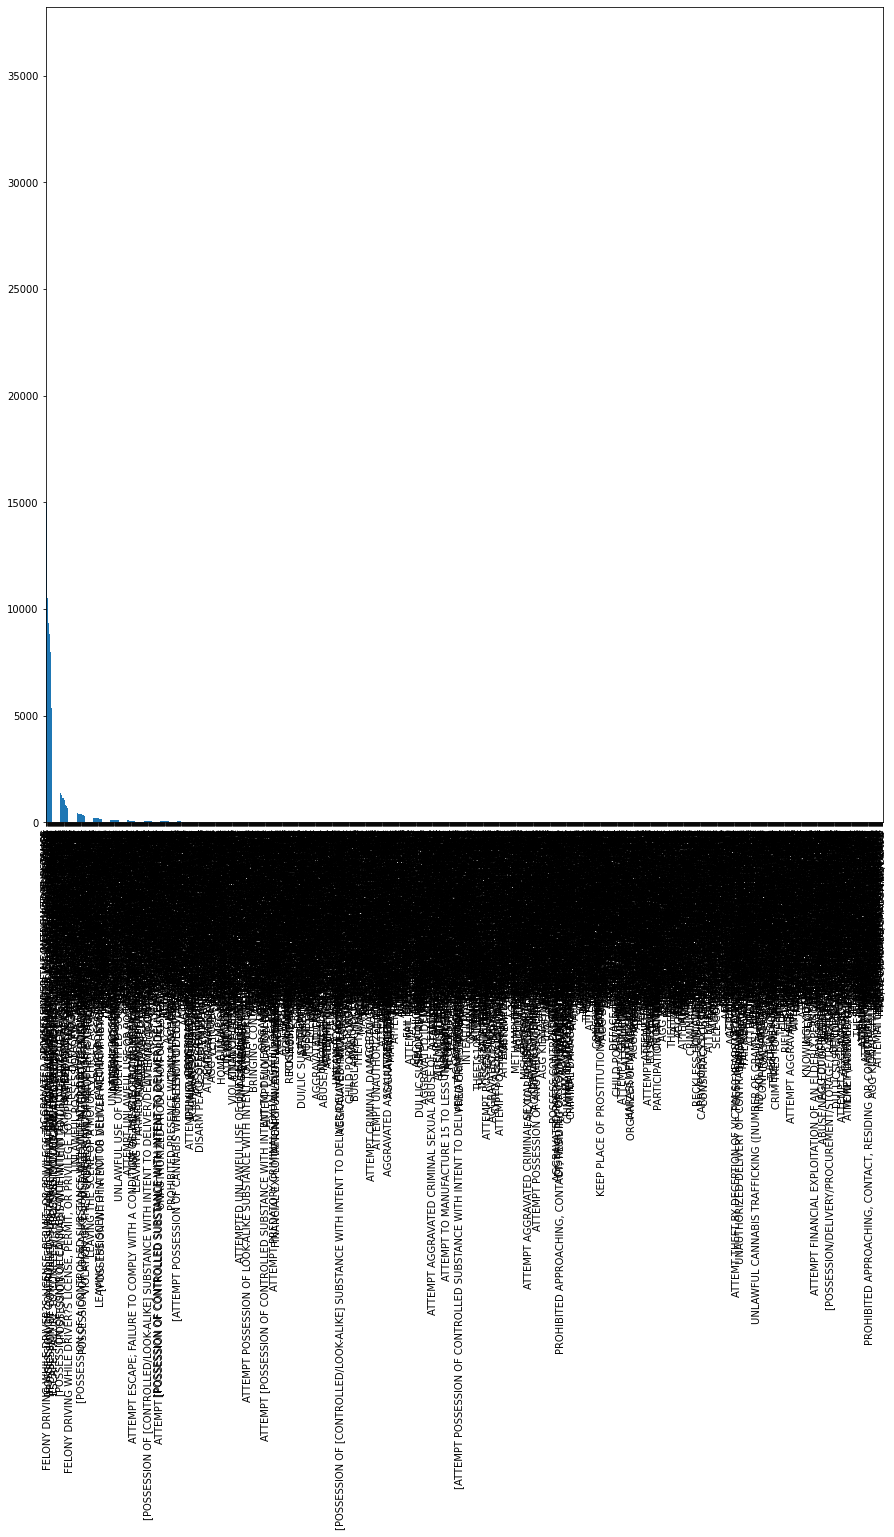

In [0]:
(dfModified2
 .DISPOSITIONCHARGEDOFFENSETITLE
 .value_counts(dropna=True)
 .plot(kind="bar", figsize=(15,15))
 )



In [0]:
dfModified2.CHARGEDISPOSITION.value_counts()

Plea Of Guilty                      208764
Finding Guilty                       21165
Verdict Guilty                        4507
Case Dismissed                         573
Nolle Prosecution                      509
FNG Reason Insanity                    143
Finding Not Not Guilty                 118
Charge Vacated                          60
FNG                                     46
Finding Guilty But Mentally Ill         39
Plea of Guilty - Amended Charge         35
Finding Guilty - Lesser Included        35
BFW                                     30
Plea of Guilty But Mentally Ill         30
Death Suggested-Cause Abated            17
Nolle On Remand                         13
Plea of Guilty - Lesser Included         8
Sexually Dangerous Person                7
Verdict-Not Guilty                       7
Verdict Guilty - Lesser Included         5
WOWI                                     4
SOL                                      2
Finding Guilty - Amended Charge          2
Verdict Gui

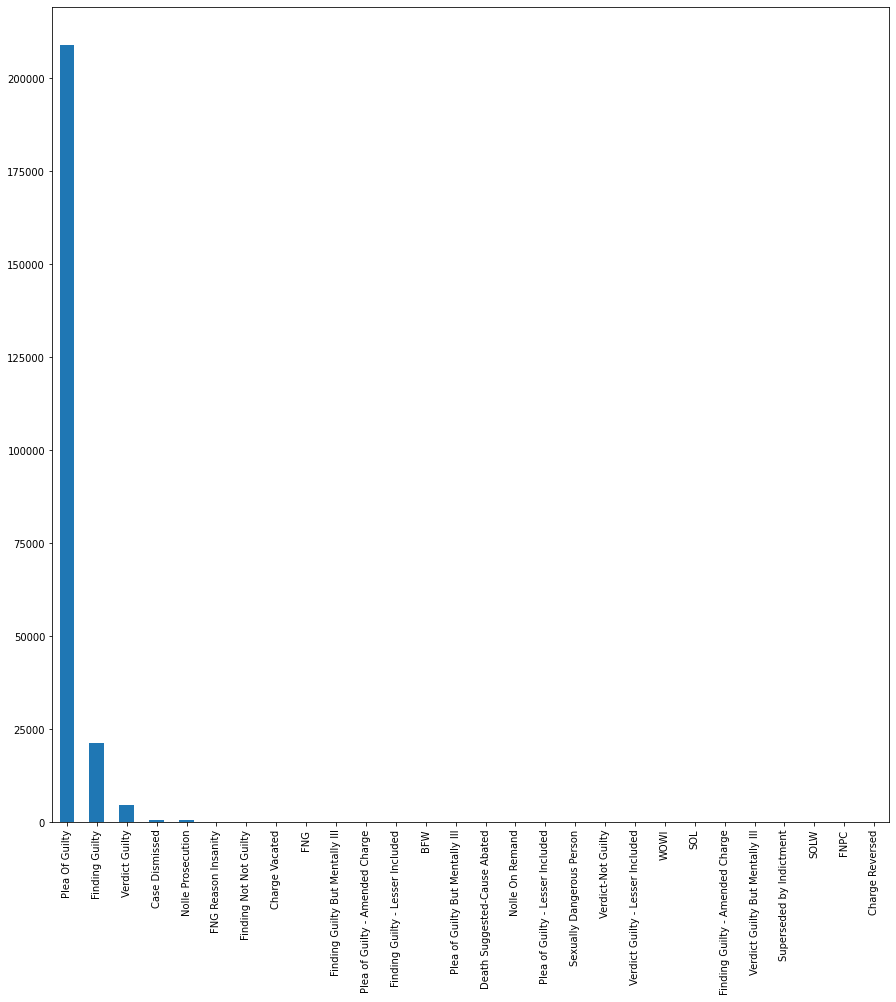

In [0]:
(dfModified2
 .CHARGEDISPOSITION
 .value_counts()
 .plot(kind="bar", figsize=(15,15))
 )

In [0]:
dfModified2.CHARGEDISPOSITIONREASON.value_counts()

Not Reported                                            235311
Drug Court Graduate                                        390
PG to Other Count/s                                        149
Mental Health Graduate                                     147
Veteran's Court Graduate                                    35
Proceeding on Other Count/s                                 32
Judgement & Conviction Vacated                              19
Adjudicated Minor                                           16
PG to Misdemeanor                                            6
Complaining Witness Not in Court                             4
Proceeding on Other Case/s                                   4
Re-Indictment                                                4
Motion to Quash Arrest & Suppress Evidence/Sustained         3
Nolle - AONIC                                                2
Deferred Prosecution Program Completed                       2
Name: CHARGEDISPOSITIONREASON, dtype: int64

In [0]:
dfModified2.GENDER.value_counts()

Male            206990
Female           28336
Not Reported       790
Other                8
Name: GENDER, dtype: int64

In [0]:
dfModified2.LENGTHOFCASEinDays.value_counts()#.hist()#eliminate negative numbers and adjust for cases more than 10 years old

 1000     18812
 0        12639
 7         2153
 35        1233
 28        1139
          ...  
 2252         1
 33117        1
-691          1
 2892         1
 5527         1
Name: LENGTHOFCASEinDays, Length: 2589, dtype: int64

In [0]:
dfModified2.AGEATINCIDENT.value_counts()#.hist()#ELIMINATE LARGE AND NEGATIVE NUMBERS

19     12091
20     11349
21     11041
22     10334
23     10001
       ...  
86         1
114        1
117        1
118        1
130        1
Name: AGEATINCIDENT, Length: 76, dtype: int64

In [0]:
dfModified2.RACE.value_counts()

Black              156707
Hispanic            42677
White               33598
Asian                1415
Nor Reported         1234
Not Reported          335
American Indian       123
Biracial               35
Name: RACE, dtype: int64

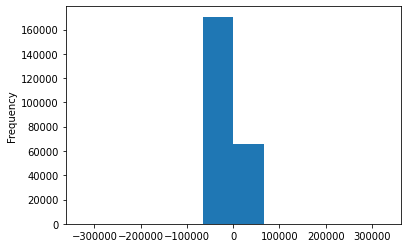

In [0]:

dfModified2.LENGTHOFCASEinDays.plot.hist()

In [0]:
dfModified2.LENGTHOFCASEinDays.describe()#Investiage why there are negative values

count    236124.000000
mean        363.332863
std        2797.629657
min     -328549.000000
25%          77.000000
50%         201.000000
75%         461.000000
max      329379.000000
Name: LENGTHOFCASEinDays, dtype: float64

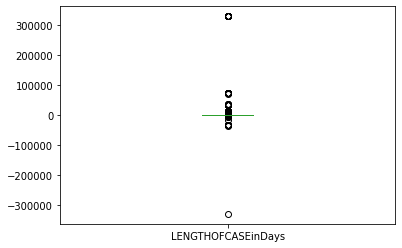

In [0]:
dfModified2.LENGTHOFCASEinDays.plot.box()

In [0]:
dfModified2.COMMITMENTTERM.value_counts()#need to replace Nan and convert to integer

2.0      46780
1.0      23968
2        18929
3.0      15675
24.0     13701
         ...  
237.0        1
2`           1
251.0        1
284.0        1
628.0        1
Name: COMMITMENTTERM, Length: 679, dtype: int64

In [0]:
dfModified2.AGEATINCIDENT.corr(dfModified2.LENGTHOFCASEinDays)

0.0022246361564659295

In [0]:
pd.pivot_table(dfModified2, values='AGEATINCIDENT', index='GENDER', aggfunc='mean')

,AGEATINCIDENT
GENDER,
Female,47.576052
Male,44.310986
Not Reported,86.039241
Other,37.125000


In [0]:
pd.pivot_table(dfModified2, values='AGEATINCIDENT', index='RACE', aggfunc='mean')

,AGEATINCIDENT
RACE,
American Indian,64.845528
Asian,42.893286
Biracial,28.742857
Black,43.588212
Hispanic,43.995993
Nor Reported,74.797407
Not Reported,53.650746
White,50.603310


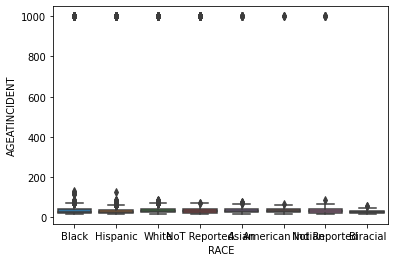

In [0]:
sns.boxplot(x='RACE', y='AGEATINCIDENT', data=dfModified2)

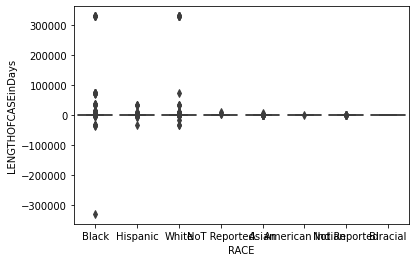

In [0]:
sns.boxplot(x='RACE', y='LENGTHOFCASEinDays', data=dfModified2)

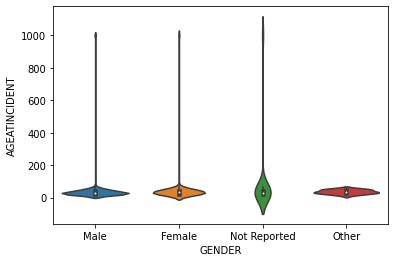

In [0]:
sns.violinplot(x='GENDER', y='AGEATINCIDENT', data=dfModified2)

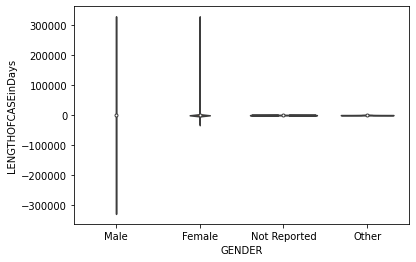

In [0]:
sns.violinplot(x='GENDER', y='LENGTHOFCASEinDays', data=dfModified2)

In [0]:
(dfModified2
 .pipe(lambda dfModified2: pd.crosstab(dfModified2.RACE, dfModified2.GENDER,margins=True))
 
)

GENDER,Female,Male,Not Reported,Other,All
RACE,,,,,
American Indian,35,88,0,0,123
Asian,212,1202,1,0,1415
Biracial,8,27,0,0,35
Black,18135,138545,23,4,156707
Hispanic,3600,39067,9,1,42677
Not Reported,176,641,752,0,1569
White,6170,27420,5,3,33598
All,28336,206990,790,8,236124


In [0]:
(dfModified2
 .pipe(lambda dfModified2: pd.crosstab(dfModified2.RACE, dfModified2.GENDER))
 .pipe(lambda dfModified2:dfModified2.div(dfModified2.sum(axis=1),axis=0))
  .mul(100)
)

NameError: ignored

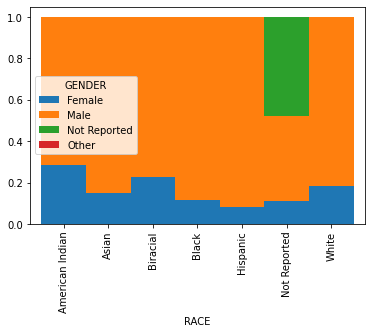

In [0]:
#gender=['Female','Male','Other','Not Reported']
#race=['American Indian','Asian','Biracial','Black','Hispanic','Not Reported','White']
(dfModified2
 .pipe(lambda dfModified2: pd.crosstab(dfModified2.RACE, dfModified2.GENDER))
 .pipe(lambda dfModified2:dfModified2.div(dfModified2.sum(axis=1),axis=0))
 #.loc[gender,race]
 .plot.bar(width=1,stacked=True)
)

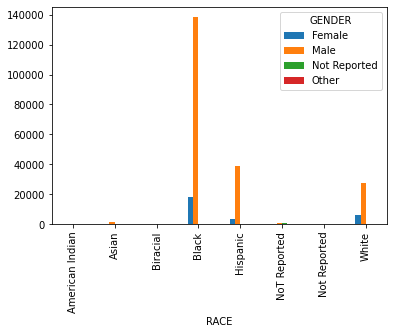

In [0]:
(dfModified2
 .pipe(lambda dfModified2: pd.crosstab(dfModified2.RACE, dfModified2.GENDER))
 .plot.bar(stacked=False)
)

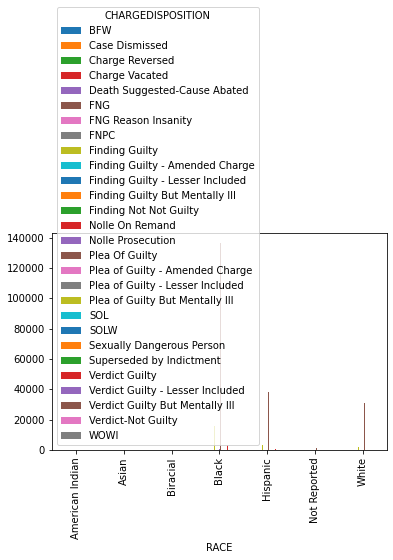

In [0]:
(dfModified2
 .pipe(lambda dfModified2: pd.crosstab(dfModified2.RACE, dfModified2.CHARGEDISPOSITION))
 .plot.bar(stacked=False)
)

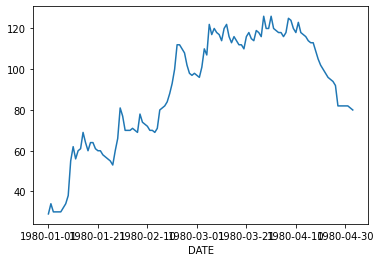

In [0]:
(df
 .assign(SNWD=df.SNWD.bfill())
 .loc[0:123]
 .set_index('DATE')
 .SNWD
 .plot()
 )

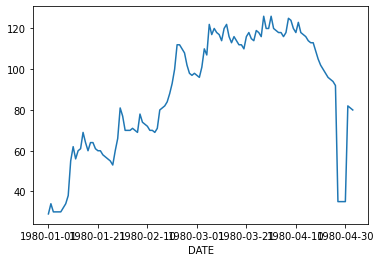

In [0]:
(df
 .assign(SNWD=df.SNWD.fillna(df.SNWD.mean()))
 .loc[0:123]
 .set_index('DATE')
 .SNWD
 .plot()
 )

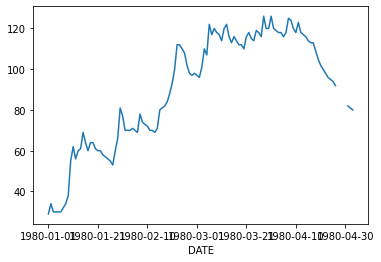

In [0]:
(df
 #.assign(SNWD=df2.SNWD.ffill())
 .loc[0:123]
 .set_index('DATE')
 .SNWD
 .plot()
 )

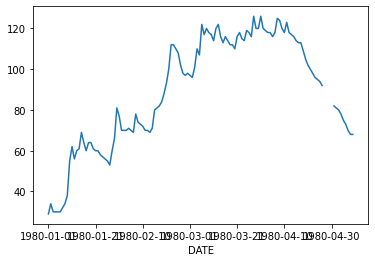

In [0]:
df.set_index('DATE').SNWD.iloc[:130].plot()

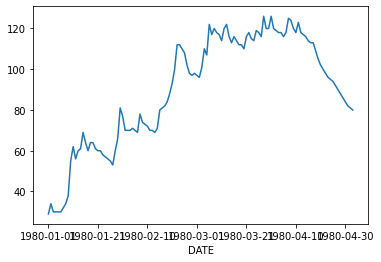

In [0]:
(df
 .assign(SNWD=df.SNWD.fillna(df.SNWD.interpolate()))
 .loc[0:123]
 .set_index('DATE')
 .SNWD
 .plot()
 )